# Task 3 : Evolution of Property in Singapore Over the Years

This notebook dives into an exploration of how the constructions of new units in Singapore has evolved over the years, and their value in today's market.

More specifically,
- We investigate the price of old condo and hdb units, and compare them with newly constructured units. We highlight a peculiar trend in prices that can be explained by Singapore government's Home Improvement Programme (HIP) initiative.
- We see the change in unit sizes, both in terms of raw property size, as well as other factors like number of rooms etc., and find interesting patterns about the changing preferences of Singapore residents.

### Setting up the Notebook

In [19]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from dataloader import read_csv
from preprocessing import preprocess_data_for_classification

### Load Cleaned Dataset

In [2]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')
testX, _ = read_csv('data/test.csv')

trainX, trainY, testX = preprocess_data_for_classification(trainX, trainY, testX)
df = trainX

df.head()

,property_type,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,subzone,planning_area,tenure_duration,is_freehold,furnishing_unspecified,furnishing_partial,furnishing_unfurnished,furnishing_fully
0,6.744873e+05,1988.0,3.0,2.0,1115.0,116.0,1.414399,103.837196,6.719120e+05,1.124002e+06,99.0,0.0,1.0,0.0,0.0,0.0
1,6.744873e+05,1992.0,4.0,2.0,1575.0,407.0,1.372597,103.875625,1.623506e+06,3.698820e+06,99.0,0.0,1.0,0.0,0.0,0.0
2,2.936166e+06,2022.0,4.0,6.0,3070.0,56.0,1.298773,103.895798,4.936251e+06,4.166730e+06,-1.0,1.0,0.0,1.0,0.0,0.0
3,2.936166e+06,2023.0,3.0,2.0,958.0,638.0,1.312364,103.803271,2.750650e+06,5.653630e+06,-1.0,1.0,0.0,1.0,0.0,0.0
4,2.936166e+06,2026.0,2.0,1.0,732.0,351.0,1.273959,103.843635,3.341467e+06,4.843187e+06,99.0,0.0,1.0,0.0,0.0,0.0


In [3]:
df = pd.concat([trainX, trainY], axis=1)
df['psf'] = df['price']/df['size_sqft']
df.head()

,property_type,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,subzone,planning_area,tenure_duration,is_freehold,furnishing_unspecified,furnishing_partial,furnishing_unfurnished,furnishing_fully,price,psf
0,6.744873e+05,1988.0,3.0,2.0,1115.0,116.0,1.414399,103.837196,6.719120e+05,1.124002e+06,99.0,0.0,1.0,0.0,0.0,0.0,514500.0,461.434978
1,6.744873e+05,1992.0,4.0,2.0,1575.0,407.0,1.372597,103.875625,1.623506e+06,3.698820e+06,99.0,0.0,1.0,0.0,0.0,0.0,995400.0,632.000000
2,2.936166e+06,2022.0,4.0,6.0,3070.0,56.0,1.298773,103.895798,4.936251e+06,4.166730e+06,-1.0,1.0,0.0,1.0,0.0,0.0,8485000.0,2763.843648
3,2.936166e+06,2023.0,3.0,2.0,958.0,638.0,1.312364,103.803271,2.750650e+06,5.653630e+06,-1.0,1.0,0.0,1.0,0.0,0.0,2626000.0,2741.127349
4,2.936166e+06,2026.0,2.0,1.0,732.0,351.0,1.273959,103.843635,3.341467e+06,4.843187e+06,99.0,0.0,1.0,0.0,0.0,0.0,1764000.0,2409.836066


In [8]:
df['built_year'].value_counts()

2023.0    2160
2025.0    1547
2024.0    1493
2017.0    1168
2022.0    1161
          ... 
1967.0      38
1971.0      33
2028.0      29
1963.0       8
1968.0       6
Name: built_year, Length: 63, dtype: int64

In [11]:
df_year = df.groupby(['built_year']).mean()
df_year.head()

,property_type,num_beds,num_baths,size_sqft,total_num_units,lat,lng,subzone,planning_area,tenure_duration,is_freehold,furnishing_unspecified,furnishing_partial,furnishing_unfurnished,furnishing_fully,price,psf
built_year,,,,,,,,,,,,,,,,,
1963.0,5.696303e+06,4.125000,2.875000,2888.750000,201.769038,1.344092,103.882801,3.614857e+06,2.284631e+06,-1.000000,1.000000,0.875000,0.000000,0.125000,0.000000,3.181075e+06,1301.179475
1967.0,6.744873e+05,2.157895,1.421053,693.815789,639.340890,1.315653,103.831614,6.516833e+05,1.848848e+06,99.000000,0.000000,0.868421,0.052632,0.078947,0.000000,4.453461e+06,6669.782544
1968.0,1.051434e+06,2.166667,1.666667,855.333333,412.245153,1.320134,103.846696,2.084133e+06,1.908582e+06,82.333333,0.166667,0.833333,0.166667,0.000000,0.000000,1.830667e+06,2476.108795
1969.0,6.744873e+05,2.170732,1.146341,808.341463,468.728162,1.310531,103.866057,1.180373e+06,1.803881e+06,99.000000,0.000000,0.829268,0.048780,0.097561,0.024390,2.101156e+06,3234.812788
1970.0,4.203055e+06,3.754545,3.109091,3395.509091,320.489682,1.323366,103.847487,2.801251e+06,2.853047e+06,70.818182,0.527273,0.845455,0.054545,0.081818,0.018182,2.308149e+06,1999.928737


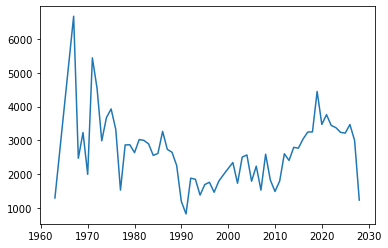

In [15]:
plt.plot(df_year.index.values, df_year['psf'])
plt.show()

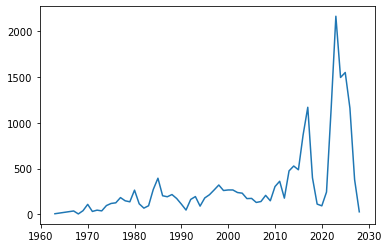

In [16]:
plt.plot(df_year.index.values, df['built_year'].value_counts().loc[df_year.index.values])
plt.show()

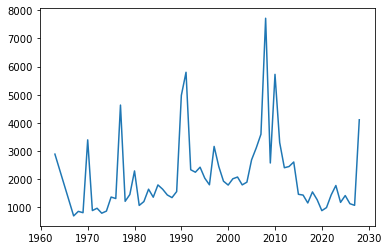

In [17]:
plt.plot(df_year.index.values, df_year['size_sqft'])
plt.show()

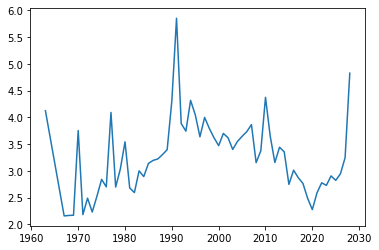

In [18]:
plt.plot(df_year.index.values, df_year['num_beds'])
plt.show()